# Násobení matic

In [1]:
import numpy as np

In [2]:
def dot(m1, m2):
    mr1 = len(m1)
    mc1 = len(m1[0])
    mr2 = len(m2)
    mc2 = len(m2[0])
    
    # Size check
    assert mr1 == mc2
    assert mc2 == mr1
    
    matrix = [ [ _ for _ in range(mc2) ] for _ in range(mr1) ]
    
    # M1 rows
    for irow in range(mr1):
        # M2 cols
        for icol in range(mc2):
            _sum = 0
            # Numbers
            for j in range(mc1):
                _sum += m1[irow][j] * m2[j][icol]
            matrix[irow][icol] = _sum
    
    return matrix

def generate_matrix(r, c):
    matrix = [ [ _ for _ in range(c) ] for _ in range(r) ]
    return matrix

### Benchmark matrix 2x2

In [3]:
m1 = generate_matrix(2, 2)
m2 = generate_matrix(2, 2)

%timeit dot(m1, m2)
%timeit np.dot(m1, m2)

2.01 µs ± 21.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.23 µs ± 39 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Benchmark matrix 4x4

In [4]:
m1 = generate_matrix(4, 4)
m2 = generate_matrix(4, 4)

%timeit dot(m1, m2)
%timeit np.dot(m1, m2)

7.13 µs ± 43.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.2 µs ± 297 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Benchmark matrix 8x8

In [5]:
m1 = generate_matrix(8, 8)
m2 = generate_matrix(8, 8)

%timeit dot(m1, m2)
%timeit np.dot(m1, m2)

40.4 µs ± 445 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
10.1 µs ± 93.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Benchmark matrix 24x12

In [6]:
m1 = generate_matrix(24, 12)
m2 = generate_matrix(12, 24)

%timeit dot(m1, m2)
%timeit np.dot(m1, m2)

516 µs ± 7.24 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
39.1 µs ± 243 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Benchmark matrix 64x128

In [7]:
m1 = generate_matrix(64, 128)
m2 = generate_matrix(128, 64)

%timeit dot(m1, m2)
%timeit np.dot(m1, m2)

37.3 ms ± 52 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.1 ms ± 1.94 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Shrnutí
- Vlastní Python implementace je rychlejší pouze pro opravdu malé matice, pro větší matice je NumPy mnohonásobně rychlejší

# Lichoběžníková metoda pro výpočet integrálu

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [9]:
def trapz(x):
    integral = 0
    for i in range(1, len(x)):
        integral += (x[i-1] + x[i]) / 2
    return integral

In [10]:
n_max = 2000
step = 10

py_speed = []
np_speed = []
ns = []

def measure(f, trials=10):
    took = []
    for i in range(trials):
        ts = time.time()
        x = f()
        t = time.time() - ts
        took.append(t)
    return np.mean( took )

for n in range(1, n_max+2, step):
    x = [_ for _ in range(n)]

    _py = measure(lambda: trapz(x), trials=100)
    _np = measure(lambda: np.trapz(x), trials=100)
    
    py_speed.append(_py)
    np_speed.append(_np)
    ns.append(n)

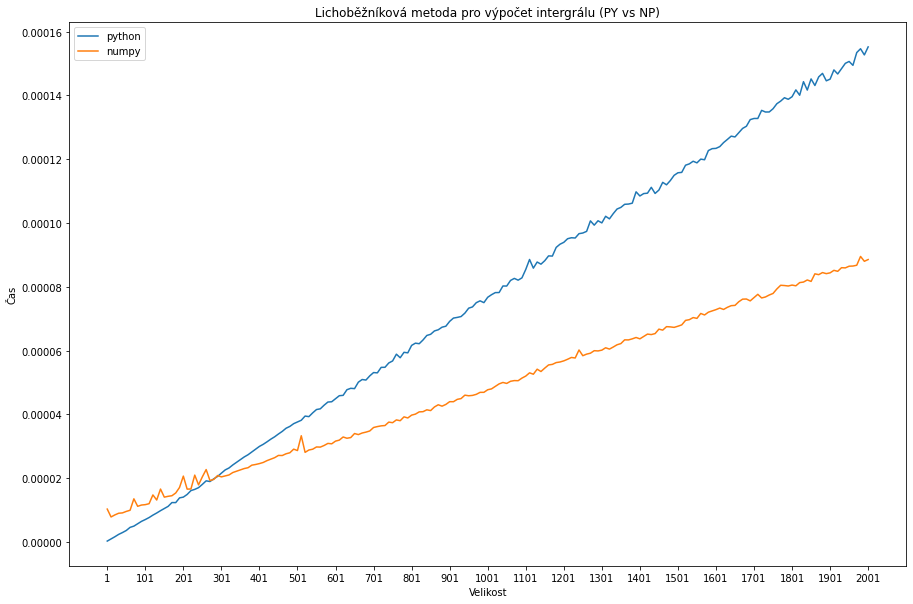

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(py_speed, label="python")
plt.plot(np_speed, label="numpy")
plt.xticks(range(0, len(ns), step), ns[::step])
plt.ylabel("Čas")
plt.xlabel("Velikost")
plt.title("Lichoběžníková metoda pro výpočet intergrálu (PY vs NP)")
plt.legend()

### Shrnutí
- Vlastní Python implementace je rychlejší pro menší N (velikost vstupního pole), ale pro větší N je NumPy značně rychlejší

# Determinant matice

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [13]:
def det(matrix):
    
    # Square matrix check
    assert len(matrix) == len(matrix[0])
    m = len(matrix)
    n = len(matrix[0])
    
    # Sign and determinant
    d = 1;

    for i in range(m):
        
        # Pivot
        p = i

        # Find new pivot if current is zero
        if matrix[i][i] == 0:
            for j in range(i+1, m):
                if p < abs(matrix[j][i]):
                    p = j

        # If new pivot then swap rows
        if p != i:
            matrix[i], matrix[p] = matrix[p], matrix[i]
            d *= -1

        # Rows under pivot
        for j in range(i+1, m):
            ratio = matrix[j][i] / matrix[i][i]
            # Substract pivot row ratio
            for k in range(n):
                matrix[j][k] -= matrix[i][k] * ratio

    # Compute determinant
    for i in range(m):
        d *= matrix[i][i]

    return d

def gen_matrix(n):
    return[ [ np.random.randint(-10, 10) for _ in range(n) ] for _ in range(n) ]

In [14]:
n_max = 20
step = 2

py_speed = []
np_speed = []
ns = []

def measure(f, trials=10):
    took = []
    for i in range(trials):
        ts = time.time()
        x = f()
        t = time.time() - ts
        took.append(t)
    return np.mean( took )

for n in range(1, n_max+2, step):
    x = gen_matrix(n)

    _py = measure(lambda: det(x), trials=100)
    _np = measure(lambda: np.linalg.det(x), trials=100)
    
    py_speed.append(_py)
    np_speed.append(_np)
    ns.append(n)

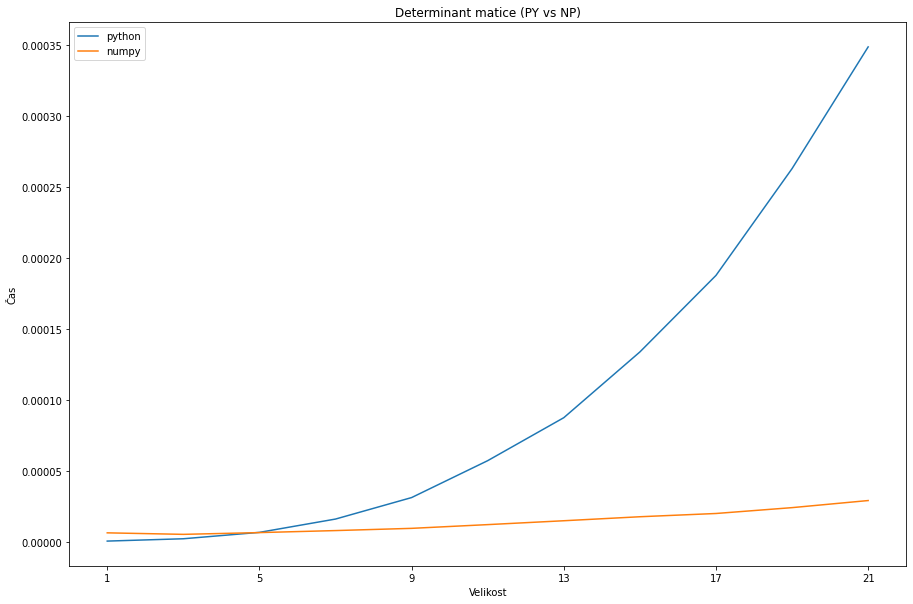

In [15]:
plt.figure(figsize=(15, 10))
plt.plot(py_speed, label="python")
plt.plot(np_speed, label="numpy")
plt.xticks(range(0, len(ns), step), ns[::step])
plt.ylabel("Čas")
plt.xlabel("Velikost")
plt.title("Determinant matice (PY vs NP)")
plt.legend()

# Shrnutí
- Vlastní implementace je trochu rychlejší než NumPy implementace u menších matic, ale u větších matic je exponenciálně pomalejší

# Kroneckerův součin matic

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [17]:
def kron(m1, m2):
    mr1 = len(m1)
    mc1 = len(m1[0])
    mr2 = len(m2)
    mc2 = len(m2[0])
    
    mk = [ [ _ for _ in range(mr1 * mr2) ] for _ in range(mc1 * mc2) ]
    
    for irow in range(mr1):
        for icol in range(mc1):
            for jrow in range(mr2):
                for jcol in range(mc2):
                    mk[(irow*mr2)+jrow][(icol*mc2)+jcol] = m1[irow][icol] * m2[jrow][jcol]
    return mk

def gen_matrix(n):
    return[ [ np.random.randint(-10, 10) for _ in range(n) ] for _ in range(n) ]

In [18]:
n_max = 10
step = 2

py_speed = []
np_speed = []
ns = []

def measure(f, trials=10):
    took = []
    for i in range(trials):
        ts = time.time()
        x = f()
        t = time.time() - ts
        took.append(t)
    return np.mean( took )

for n in range(1, n_max+2, step):
    x1 = gen_matrix(n)
    x2 = gen_matrix(n)

    _py = measure(lambda: kron(x1, x2), trials=100)
    _np = measure(lambda: np.kron(x1, x2), trials=100)
    
    py_speed.append(_py)
    np_speed.append(_np)
    ns.append(n)

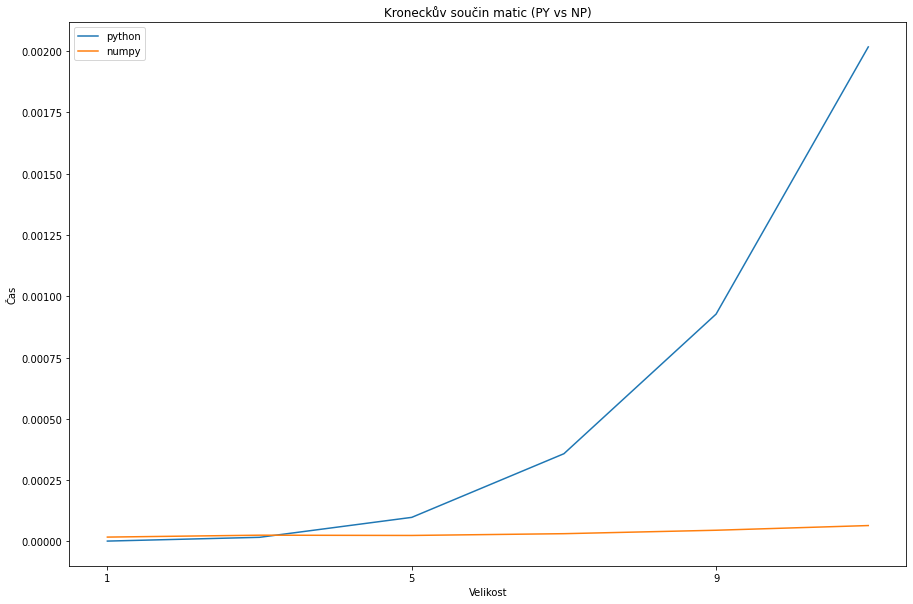

In [19]:
plt.figure(figsize=(15, 10))
plt.plot(py_speed, label="python")
plt.plot(np_speed, label="numpy")
plt.xticks(range(0, len(ns), step), ns[::step])
plt.ylabel("Čas")
plt.xlabel("Velikost")
plt.title("Kroneckův součin matic (PY vs NP)")
plt.legend()

# Shrnutí
- Vlastní implementace je mírně rychlejší u malých matic, u větších je exponenciálně pomalejší než NumPy

# Euklidovská vzdálenost vektorů

In [20]:
from scipy.spatial import distance
import matplotlib.pyplot as plt
import numpy as np
import time

In [21]:
def euclidean(v1, v2):
    assert len(v1) == len(v2)
    d = 0
    for i in range(len(v1)):
        d += (v1[i] - v2[i])**2
    
    return np.sqrt(d)

In [22]:
n_max = 500
step = 5

py_speed = []
sp_speed = []
ns = []

def measure(f, trials=10):
    took = []
    for i in range(trials):
        ts = time.time()
        x = f()
        t = time.time() - ts
        took.append(t)
    return np.mean( took )

for n in range(1, n_max+2, step):
    v1 = [_ for _ in range(n)]
    v2 = v1[::-1]

    _py = measure(lambda: euclidean(v1, v2), trials=100)
    _sp = measure(lambda: distance.euclidean(v1, v2), trials=100)
    
    py_speed.append(_py)
    sp_speed.append(_sp)
    ns.append(n)

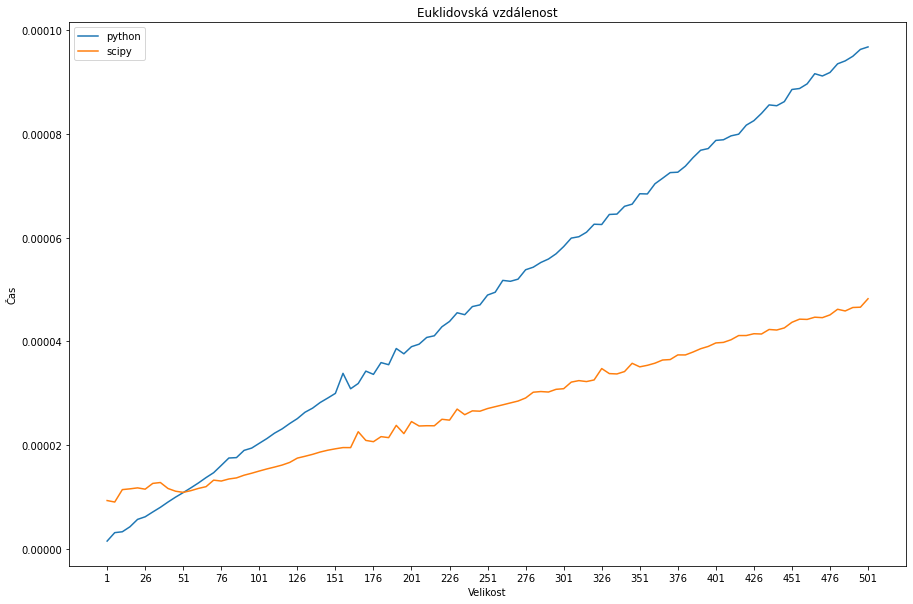

In [23]:
plt.figure(figsize=(15, 10))
plt.plot(py_speed, label="python")
plt.plot(sp_speed, label="scipy")
plt.xticks(range(0, len(ns), step), ns[::step])
plt.ylabel("Čas")
plt.xlabel("Velikost")
plt.title("Euklidovská vzdálenost")
plt.legend()

# Shrnutí
- Vlastní implementace je rychleší pouze pro malé vektory, časová náročnost stoupá lineárně a má větší sklon oproti scipy implementaci